In [1]:
from paths import metadata_folder

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# List metadata files

In [3]:
list(metadata_folder.glob("metadata_*"))

[PosixPath('/afs/cern.ch/work/l/lcoyle/public/obsbox_analysis/metadata/metadata_B2H_Inst_23528.h5'),
 PosixPath('/afs/cern.ch/work/l/lcoyle/public/obsbox_analysis/metadata/metadata_B1H_Inst_32.h5'),
 PosixPath('/afs/cern.ch/work/l/lcoyle/public/obsbox_analysis/metadata/metadata_B1H_Inst_1024.h5'),
 PosixPath('/afs/cern.ch/work/l/lcoyle/public/obsbox_analysis/metadata/metadata_B1H_Inst_34994.h5'),
 PosixPath('/afs/cern.ch/work/l/lcoyle/public/obsbox_analysis/metadata/metadata_B1V_Inst_51335.h5'),
 PosixPath('/afs/cern.ch/work/l/lcoyle/public/obsbox_analysis/metadata/metadata_B2V_Inst_60652.h5')]

I'm taking all the partial metadata files for the Instability data type and combining them all.

In [4]:
partial_metadata_files = {"B1H": metadata_folder / "metadata_B1H_Inst_34994.h5",
                          "B1V": metadata_folder / "metadata_B1V_Inst_51335.h5",
                          "B2H": metadata_folder / "metadata_B2H_Inst_23528.h5",
                          "B2V": metadata_folder / "metadata_B2V_Inst_60652.h5"}

In [5]:
partial_meta_dfs = {key: pd.read_hdf(file_path) for key, file_path in partial_metadata_files.items()}

In [6]:
meta_df = pd.concat(partial_meta_dfs.values())
meta_df.shape

(57317564, 11)

In [7]:
meta_df.head()

,type,fill,beam,plane,q,date_time,file,n_bunches,bunch_index,bunch_number,ts_length
1,Inst,7478,1,h,7,2018-11-27 14:49:16,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7478/...,20,0.0,0.0,65536
2,Inst,7478,1,h,7,2018-11-27 14:49:16,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7478/...,20,4.0,1.0,65536
3,Inst,7478,1,h,7,2018-11-27 14:49:16,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7478/...,20,8.0,2.0,65536
4,Inst,7478,1,h,7,2018-11-27 14:49:16,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7478/...,20,12.0,3.0,65536
5,Inst,7478,1,h,7,2018-11-27 14:49:16,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7478/...,20,894.0,4.0,65536


go back to file level, each entry is a single file, i.e. a trigger of the ObsBox

In [8]:
meta_df_grouped = meta_df.drop_duplicates(["file"]).drop(["bunch_index", "bunch_number"], axis=1)
meta_df_grouped.shape

(170509, 9)

In [9]:
meta_df_grouped.head()

,type,fill,beam,plane,q,date_time,file,n_bunches,ts_length
1,Inst,7478,1,h,7,2018-11-27 14:49:16,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7478/...,20,65536
21,Inst,6897,1,h,7,2018-07-08 00:36:16,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6897/...,192,65536
213,Inst,6272,1,h,7,2017-10-05 01:30:07,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6272/...,972,65536
1185,Inst,7486,1,h,7,2018-11-30 09:54:15,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7486/...,733,65536
1918,Inst,6990,1,h,7,2018-07-27 09:47:15,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6990/...,444,65536


# Check the plane/beam distributions

<AxesSubplot:title={'center':'Beam/plane ObsBox trigger split'}>

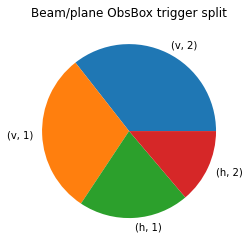

In [10]:
meta_df_grouped.value_counts(["plane", "beam"]).plot.pie(ylabel="", title="Beam/plane ObsBox trigger split")

# Check the time distributions

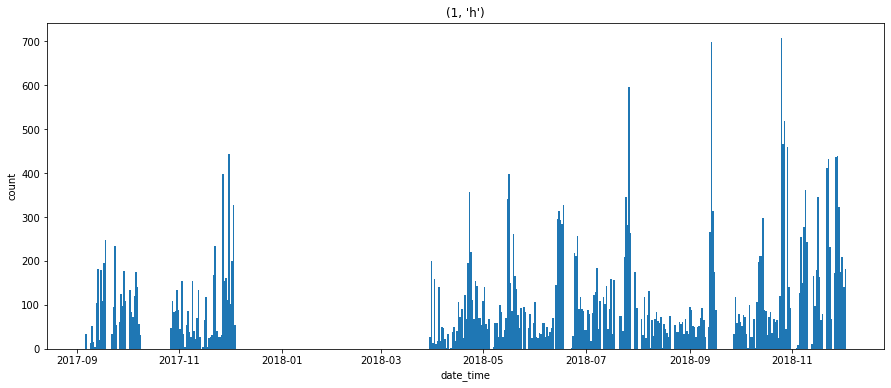

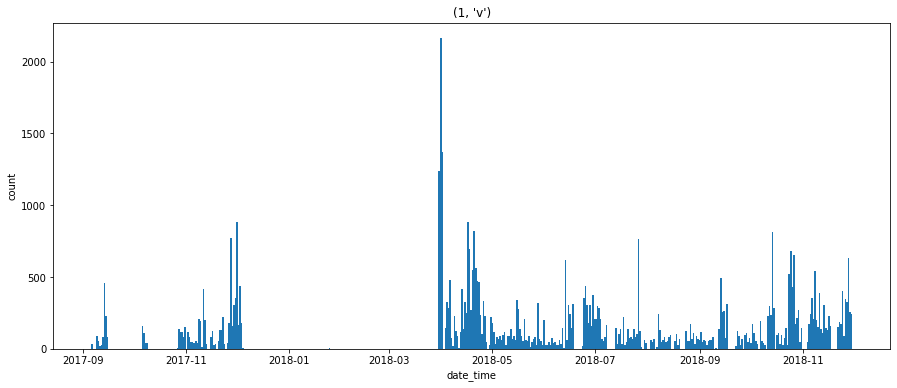

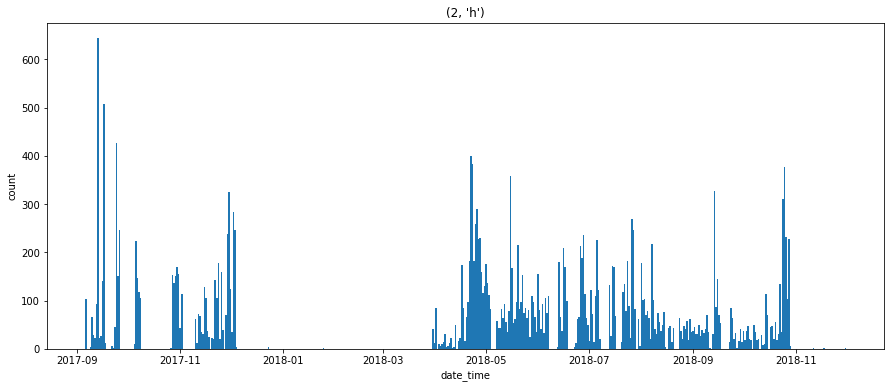

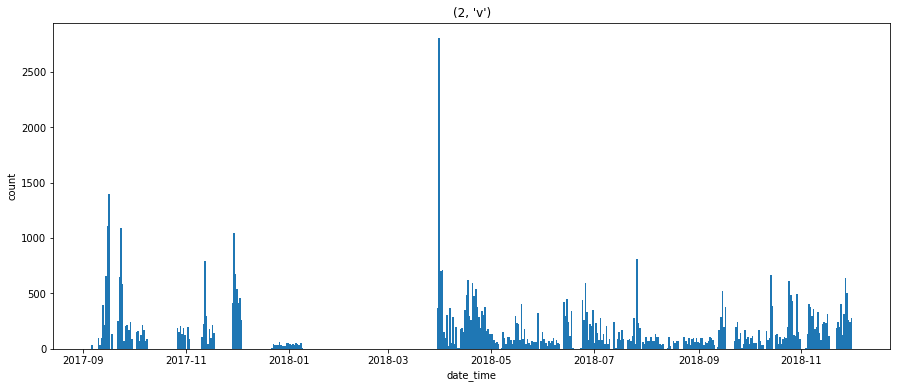

In [11]:
for group, df in meta_df_grouped.groupby(["beam", "plane"])["date_time"]:
    plt.figure(figsize=(15, 6))
    plt.hist(df, bins=500)
    plt.title(group)
    plt.xlabel("date_time")
    plt.ylabel("count")
    plt.show()

# Check the number of bunch histograms

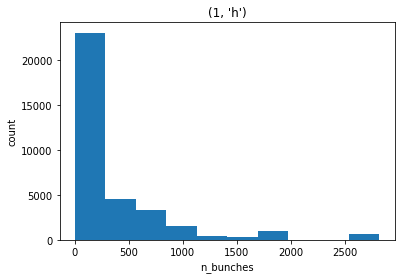

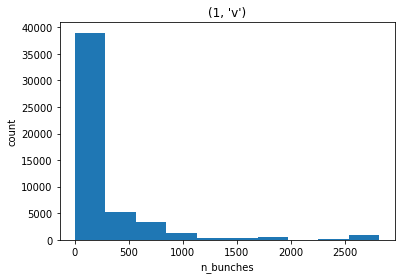

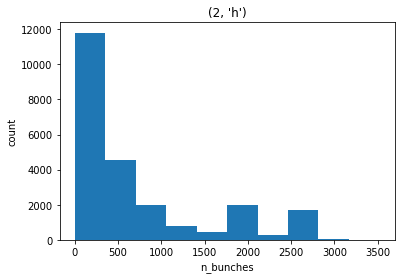

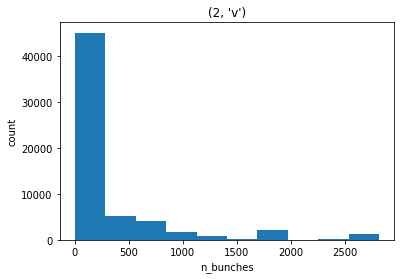

In [12]:
for group, df in meta_df_grouped.groupby(["beam", "plane"])["n_bunches"]:
    plt.hist(df)
    plt.title(group)
    plt.xlabel("n_bunches")
    plt.ylabel("count")
    plt.show()